### 1) IMPORTING LIBRARIES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### 2) READ AND UNDERSTAND DATA 


In [2]:
df=pd.read_csv('/Users/shivamgautam/Downloads/Untitled Folder/iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3) Exploring DATA 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.columns=[i.lower() for i in df.columns] #changing to lower case columns name

In [7]:
df['species'].unique() #cheking for unique values in column species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['species'].nunique() #number of unique value in columns

3

In [9]:
df['species'].value_counts() #number of count for individual caterogy in species column

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
df.describe()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

### 4) Data Visualization

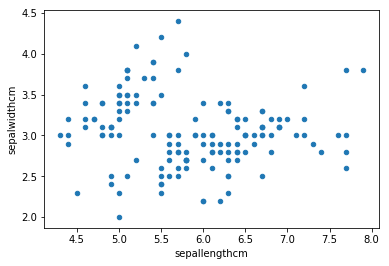

In [12]:
#pandas functiom plot is an extension from pandas dataframe
df.plot(x='sepallengthcm',y='sepalwidthcm',kind='scatter')

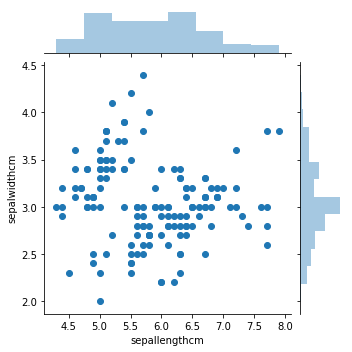

In [13]:
sns.jointplot(x='sepallengthcm',y='sepalwidthcm',data=df,height=5)
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

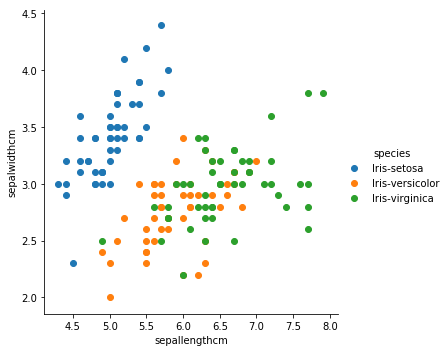

In [14]:
sns.FacetGrid(data=df,hue='species',height=5).map(plt.scatter,'sepallengthcm','sepalwidthcm').add_legend()
#color the scatterplot by species, Multi-plot grid for plotting conditional relationships

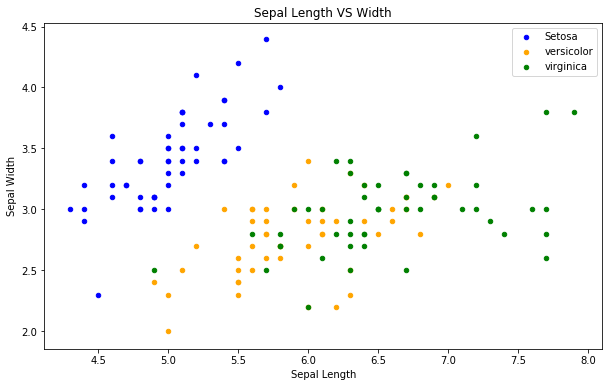

In [15]:
fig = df[df.species=='Iris-setosa'].plot(kind='scatter',x='sepallengthcm',y='sepalwidthcm',color='blue', label='Setosa')
df[df.species=='Iris-versicolor'].plot(kind='scatter',x='sepallengthcm',y='sepalwidthcm',color='orange', label='versicolor',ax=fig)
df[df.species=='Iris-virginica'].plot(kind='scatter',x='sepallengthcm',y='sepalwidthcm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

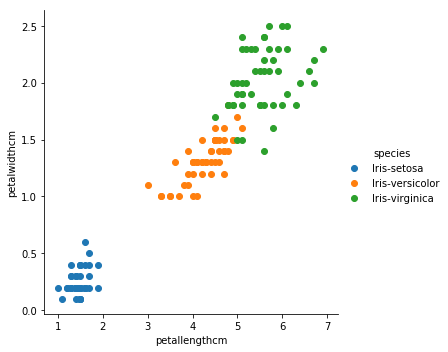

In [16]:
sns.FacetGrid(data=df,hue='species',height=5).map(plt.scatter,'petallengthcm','petalwidthcm').add_legend()

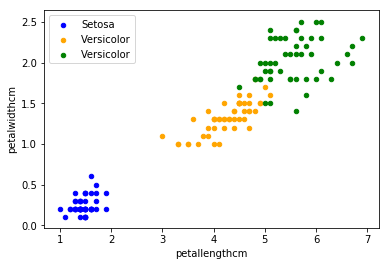

In [17]:
#like above
fig=df[df.species=='Iris-setosa'].plot(kind='scatter',x='petallengthcm',y='petalwidthcm',color='Blue',label='Setosa')
df[df.species=='Iris-versicolor'].plot(kind='scatter',x='petallengthcm',y='petalwidthcm',color='orange',label='Versicolor',ax=fig)
df[df.species=='Iris-virginica'].plot(kind='scatter',x='petallengthcm',y='petalwidthcm',color='green',label='Versicolor',ax=fig)



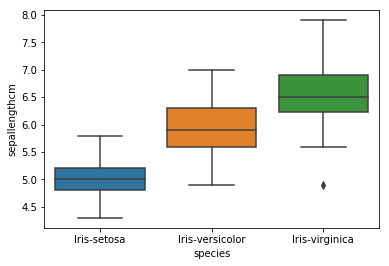

In [18]:
sns.boxplot(data=df,x='species',y='sepallengthcm')
# We can look at an individual feature in Seaborn through a boxplot

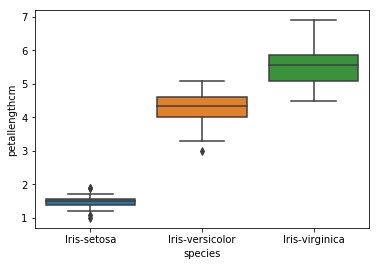

In [19]:
sns.boxplot(data=df,x='species',y='petallengthcm')

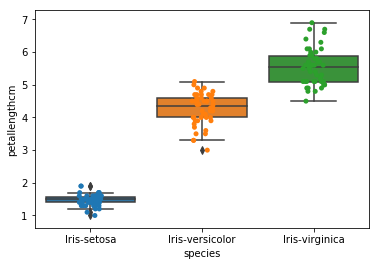

In [20]:
ax=sns.boxplot(x='species',y='petallengthcm',data=df)
ax=sns.stripplot(x='species',y='petallengthcm',data=df,jitter=True,edgecolor='grey')

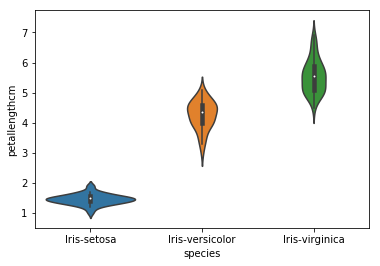

In [21]:
sns.violinplot(x="species", y="petallengthcm", data=df, size=6)
#Denser regions of the data are fatter, and sparser thiner in a violin plot

/Users/shivamgautam/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


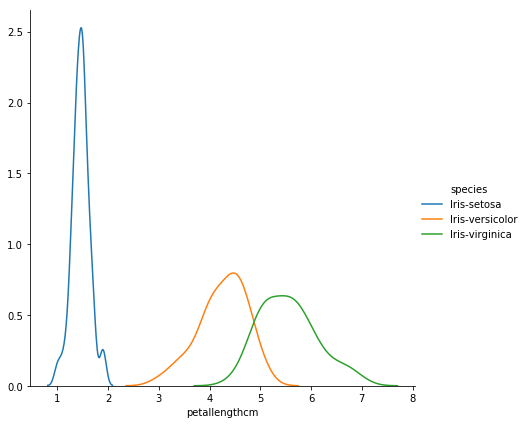

In [22]:
sns.FacetGrid(df, hue="species", size=6).map(sns.kdeplot, "petallengthcm").add_legend()

In [23]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features
#From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

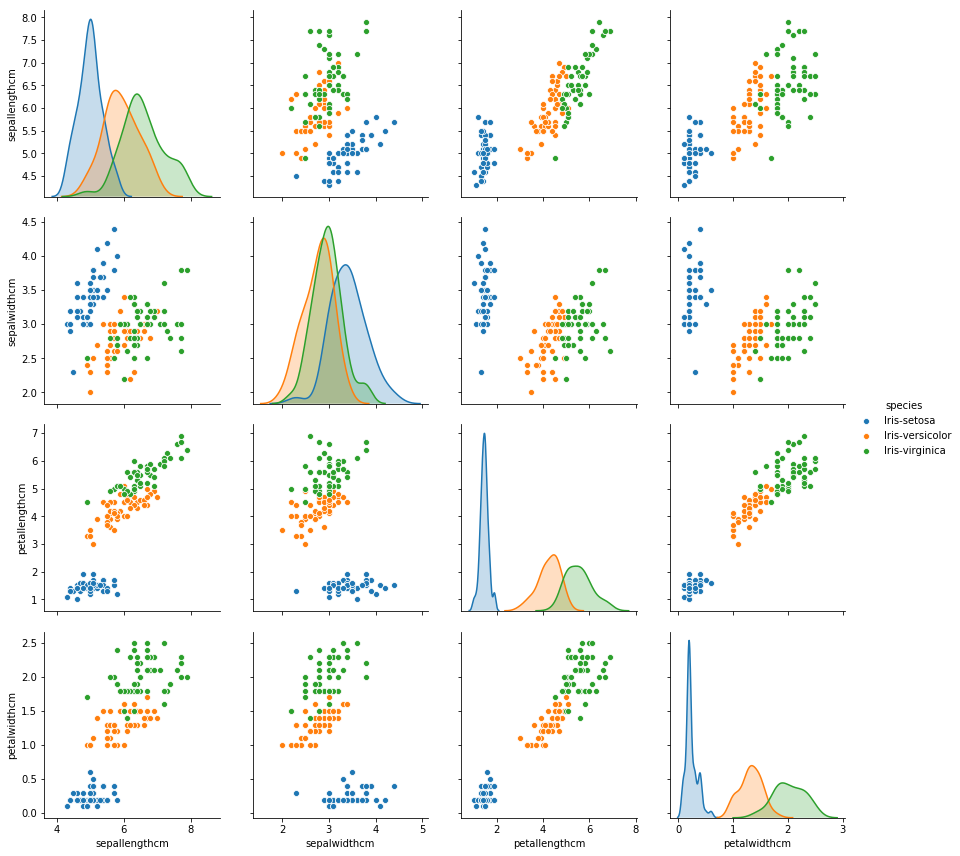

In [24]:
sns.pairplot(df.drop('id',axis=1),hue='species',height=3)

In [25]:

#Axis 0 will act on all the ROWS in each COLUMN
#Axis 1 will act on all the COLUMNS in each ROW

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda701a64a8>,
      dtype=object)

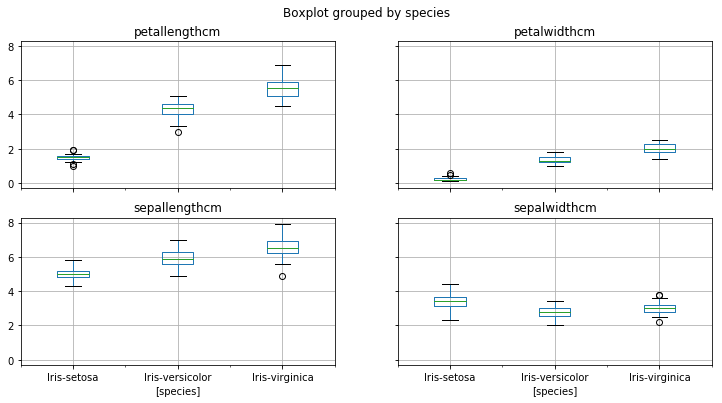

In [26]:
df.drop('id',axis=1).boxplot(by='species',figsize=(12,6))

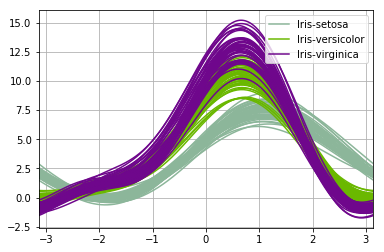

In [27]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df.drop("id", axis=1), "species")


In [28]:
## Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

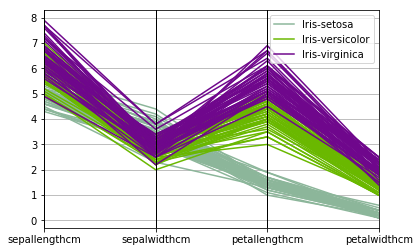

In [29]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("id", axis=1), "species")

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,recall_score,precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_validate,cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
df.shape

(150, 6)

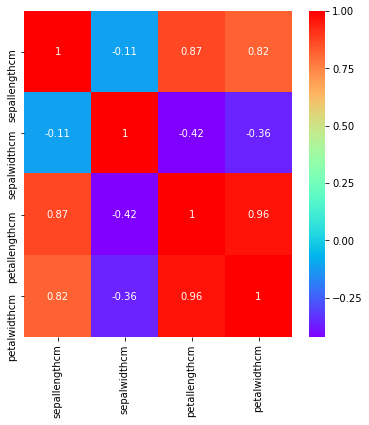

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(df.drop('id',axis=1).corr(),annot=True,cmap='rainbow') #cubehelix_r
plt.show()

In [33]:
y=df.select_dtypes(include='object')

In [34]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [35]:
x=df.select_dtypes(exclude='object')

In [36]:
x.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [37]:
x=x.drop('id',axis=1)

In [38]:
x.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
le=LabelEncoder()
y=df.iloc[:,-1]

In [40]:
y=le.fit_transform(y)

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
x= x.iloc[:,:].values

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)


In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [45]:
scalar=StandardScaler()
scalar.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [47]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
results=[]
names=[]

for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(names)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.883333 (0.066667)
LDA: 0.975000 (0.038188)
KNN: 0.925000 (0.078617)
SVM: 0.950000 (0.076376)
CART: 0.941667 (0.075000)
NB: 0.941667 (0.053359)


In [48]:
knn=KNeighborsClassifier()
lr=LogisticRegression(solver='lbfgs',multi_class='ovr')
nb=GaussianNB()
cart=DecisionTreeClassifier()
svm=SVC(gamma='auto')
lda=LinearDiscriminantAnalysis()
knn.fit(x_train,y_train)
lr.fit(x_train,y_train)
nb.fit(x_train,y_train)
cart.fit(x_train,y_train)
svm.fit(x_train,y_train)
lda.fit(x_train,y_train)
predictions=knn.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

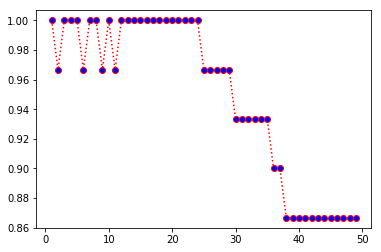

In [49]:
a=pd.Series()
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(range(1,50),a,color='red',linestyle='dotted',marker='o',markerfacecolor='blue',markersize=6)
plt.xticks()

In [50]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
round(knn_cv.best_score_,2)*100

98.0

In [53]:
knn_cv.best_params_

{'n_neighbors': 6}